# 1-2,ÂõæÁâáÊï∞ÊçÆÂª∫Ê®°ÊµÅÁ®ãËåÉ‰æã

In [2]:
import os
import datetime

#ÊâìÂç∞Êó∂Èó¥
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)

#macÁ≥ªÁªü‰∏äpytorchÂíåmatplotlibÂú®jupyter‰∏≠ÂêåÊó∂Ë∑ëÈúÄË¶ÅÊõ¥ÊîπÁéØÂ¢ÉÂèòÈáè
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 

### ‰∏ÄÔºåÂáÜÂ§áÊï∞ÊçÆ

cifar2Êï∞ÊçÆÈõÜ‰∏∫cifar10Êï∞ÊçÆÈõÜÁöÑÂ≠êÈõÜÔºåÂè™ÂåÖÊã¨Ââç‰∏§ÁßçÁ±ªÂà´airplaneÂíåautomobile„ÄÇ

ËÆ≠ÁªÉÈõÜÊúâairplaneÂíåautomobileÂõæÁâáÂêÑ5000Âº†ÔºåÊµãËØïÈõÜÊúâairplaneÂíåautomobileÂõæÁâáÂêÑ1000Âº†„ÄÇ

cifar2‰ªªÂä°ÁöÑÁõÆÊ†áÊòØËÆ≠ÁªÉ‰∏Ä‰∏™Ê®°ÂûãÊù•ÂØπÈ£ûÊú∫airplaneÂíåÊú∫Âä®ËΩ¶automobile‰∏§ÁßçÂõæÁâáËøõË°åÂàÜÁ±ª„ÄÇ

Êàë‰ª¨ÂáÜÂ§áÁöÑCifar2Êï∞ÊçÆÈõÜÁöÑÊñá‰ª∂ÁªìÊûÑÂ¶Ç‰∏ãÊâÄÁ§∫„ÄÇ

![](./data/cifar2.jpg)

Âú®Pytorch‰∏≠ÊûÑÂª∫ÂõæÁâáÊï∞ÊçÆÁÆ°ÈÅìÈÄöÂ∏∏Êúâ‰∏§ÁßçÊñπÊ≥ï„ÄÇ

Á¨¨‰∏ÄÁßçÊòØ‰ΩøÁî® torchvision‰∏≠ÁöÑdatasets.ImageFolderÊù•ËØªÂèñÂõæÁâáÁÑ∂ÂêéÁî® DataLoaderÊù•Âπ∂Ë°åÂä†ËΩΩ„ÄÇ

Á¨¨‰∫åÁßçÊòØÈÄöËøáÁªßÊâø torch.utils.data.Dataset ÂÆûÁé∞Áî®Êà∑Ëá™ÂÆö‰πâËØªÂèñÈÄªËæëÁÑ∂ÂêéÁî® DataLoaderÊù•Âπ∂Ë°åÂä†ËΩΩ„ÄÇ

Á¨¨‰∫åÁßçÊñπÊ≥ïÊòØËØªÂèñÁî®Êà∑Ëá™ÂÆö‰πâÊï∞ÊçÆÈõÜÁöÑÈÄöÁî®ÊñπÊ≥ïÔºåÊó¢ÂèØ‰ª•ËØªÂèñÂõæÁâáÊï∞ÊçÆÈõÜÔºå‰πüÂèØ‰ª•ËØªÂèñÊñáÊú¨Êï∞ÊçÆÈõÜ„ÄÇ

Êú¨ÁØáÊàë‰ª¨‰ªãÁªçÁ¨¨‰∏ÄÁßçÊñπÊ≥ï„ÄÇ


In [4]:
import torch 
from torch import nn
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms,datasets 

In [5]:
transform_train = transforms.Compose(
    [transforms.ToTensor()])
transform_valid = transforms.Compose(
    [transforms.ToTensor()])

In [6]:
ds_train = datasets.ImageFolder("./data/cifar2/train/",
            transform = transform_train,target_transform= lambda t:torch.tensor([t]).float())
ds_valid = datasets.ImageFolder("./data/cifar2/test/",
            transform = transform_train,target_transform= lambda t:torch.tensor([t]).float())

print(ds_train.class_to_idx)

{'0_airplane': 0, '1_automobile': 1}


```
{'0_airplane': 0, '1_automobile': 1}
```

In [7]:
dl_train = DataLoader(ds_train,batch_size = 50,shuffle = True,num_workers=3)
dl_valid = DataLoader(ds_valid,batch_size = 50,shuffle = True,num_workers=3)

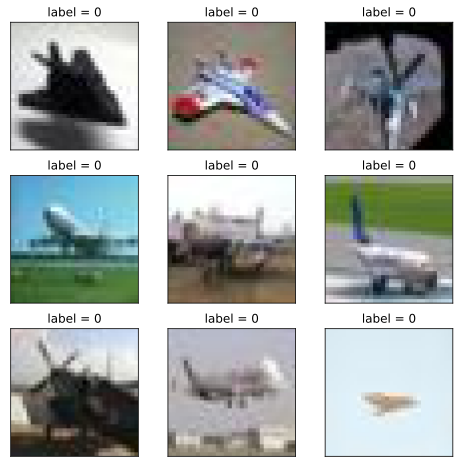

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#Êü•ÁúãÈÉ®ÂàÜÊ†∑Êú¨
from matplotlib import pyplot as plt 

plt.figure(figsize=(8,8)) 
for i in range(9):
    img,label = ds_train[i]
    img = img.permute(1,2,0)
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d"%label.item())
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()


![](./data/1-2-Êü•ÁúãÊ†∑Êú¨.png)

In [14]:
# PytorchÁöÑÂõæÁâáÈªòËÆ§È°∫Â∫èÊòØ Batch,Channel,Width,Height
for x,y in dl_train:
    print(x.shape,y.shape) 
    break
    

torch.Size([50, 3, 32, 32]) torch.Size([50, 1])


```
torch.Size([50, 3, 32, 32]) torch.Size([50, 1])
```

### ‰∫åÔºåÂÆö‰πâÊ®°Âûã

‰ΩøÁî®PytorchÈÄöÂ∏∏Êúâ‰∏âÁßçÊñπÂºèÊûÑÂª∫Ê®°ÂûãÔºö‰ΩøÁî®nn.SequentialÊåâÂ±ÇÈ°∫Â∫èÊûÑÂª∫Ê®°ÂûãÔºåÁªßÊâønn.ModuleÂü∫Á±ªÊûÑÂª∫Ëá™ÂÆö‰πâÊ®°ÂûãÔºåÁªßÊâønn.ModuleÂü∫Á±ªÊûÑÂª∫Ê®°ÂûãÂπ∂ËæÖÂä©Â∫îÁî®Ê®°ÂûãÂÆπÂô®(nn.Sequential,nn.ModuleList,nn.ModuleDict)ËøõË°åÂ∞ÅË£Ö„ÄÇ

Ê≠§Â§ÑÈÄâÊã©ÈÄöËøáÁªßÊâønn.ModuleÂü∫Á±ªÊûÑÂª∫Ëá™ÂÆö‰πâÊ®°Âûã„ÄÇ

In [15]:
#ÊµãËØïAdaptiveMaxPool2dÁöÑÊïàÊûú
pool = nn.AdaptiveMaxPool2d((1,1))
t = torch.randn(10,8,32,32)
pool(t).shape 

torch.Size([10, 8, 1, 1])

```
torch.Size([10, 8, 1, 1])
```

In [16]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size = 3)
        self.pool = nn.MaxPool2d(kernel_size = 2,stride = 2)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size = 5)
        self.dropout = nn.Dropout2d(p = 0.1)
        self.adaptive_pool = nn.AdaptiveMaxPool2d((1,1))
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(64,32)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(32,1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.dropout(x)
        x = self.adaptive_pool(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.sigmoid(x)
        return y
        
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.1, inplace=False)
  (adaptive_pool): AdaptiveMaxPool2d(output_size=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


```
Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.1, inplace=False)
  (adaptive_pool): AdaptiveMaxPool2d(output_size=(1, 1))
  (flatten): Flatten()
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
```

In [17]:
import torchkeras
torchkeras.summary(net,input_shape= (3,32,32))

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/metrics/__init__.py:44: LightningDeprecationWarning: `pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package (https://github.com/PyTorchLightning/metrics) since v1.3 and will be removed in v1.5
  "`pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package"


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 11, 11]          51,264
         MaxPool2d-4             [-1, 64, 5, 5]               0
         Dropout2d-5             [-1, 64, 5, 5]               0
 AdaptiveMaxPool2d-6             [-1, 64, 1, 1]               0
           Flatten-7                   [-1, 64]               0
            Linear-8                   [-1, 32]           2,080
              ReLU-9                   [-1, 32]               0
           Linear-10                    [-1, 1]              33
          Sigmoid-11                    [-1, 1]               0
Total params: 54,273
Trainable params: 54,273
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.011719
Forwar

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


```
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================
            Conv2d-1           [-1, 32, 30, 30]             896
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 11, 11]          51,264
         MaxPool2d-4             [-1, 64, 5, 5]               0
         Dropout2d-5             [-1, 64, 5, 5]               0
 AdaptiveMaxPool2d-6             [-1, 64, 1, 1]               0
           Flatten-7                   [-1, 64]               0
            Linear-8                   [-1, 32]           2,080
              ReLU-9                   [-1, 32]               0
           Linear-10                    [-1, 1]              33
          Sigmoid-11                    [-1, 1]               0
================================================================
Total params: 54,273
Trainable params: 54,273
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.011719
Forward/backward pass size (MB): 0.359634
Params size (MB): 0.207035
Estimated Total Size (MB): 0.578388
----------------------------------------------------------------
```

### ‰∏âÔºåËÆ≠ÁªÉÊ®°Âûã

PytorchÈÄöÂ∏∏ÈúÄË¶ÅÁî®Êà∑ÁºñÂÜôËá™ÂÆö‰πâËÆ≠ÁªÉÂæ™ÁéØÔºåËÆ≠ÁªÉÂæ™ÁéØÁöÑ‰ª£Á†ÅÈ£éÊ†ºÂõ†‰∫∫ËÄåÂºÇ„ÄÇ

Êúâ3Á±ªÂÖ∏ÂûãÁöÑËÆ≠ÁªÉÂæ™ÁéØ‰ª£Á†ÅÈ£éÊ†ºÔºöËÑöÊú¨ÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØÔºåÂáΩÊï∞ÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØÔºåÁ±ªÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØ„ÄÇ

Ê≠§Â§Ñ‰ªãÁªç‰∏ÄÁßçËæÉÈÄöÁî®ÁöÑÂáΩÊï∞ÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØ„ÄÇ


In [18]:
import pandas as pd 
from sklearn.metrics import roc_auc_score

model = net
model.optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)
model.loss_func = torch.nn.BCELoss()
model.metric_func = lambda y_pred,y_true: roc_auc_score(y_true.data.numpy(),y_pred.data.numpy())
model.metric_name = "auc"


In [19]:
def train_step(model,features,labels):
    
    # ËÆ≠ÁªÉÊ®°ÂºèÔºådropoutÂ±ÇÂèëÁîü‰ΩúÁî®
    model.train()
    
    # Ê¢ØÂ∫¶Ê∏ÖÈõ∂
    model.optimizer.zero_grad()
    
    # Ê≠£Âêë‰º†Êí≠Ê±ÇÊçüÂ§±
    predictions = model(features)
    loss = model.loss_func(predictions,labels)
    metric = model.metric_func(predictions,labels)

    # ÂèçÂêë‰º†Êí≠Ê±ÇÊ¢ØÂ∫¶
    loss.backward()
    model.optimizer.step()

    return loss.item(),metric.item()

def valid_step(model,features,labels):
    
    # È¢ÑÊµãÊ®°ÂºèÔºådropoutÂ±Ç‰∏çÂèëÁîü‰ΩúÁî®
    model.eval()
    # ÂÖ≥Èó≠Ê¢ØÂ∫¶ËÆ°ÁÆó
    with torch.no_grad():
        predictions = model(features)
        loss = model.loss_func(predictions,labels)
        metric = model.metric_func(predictions,labels)
    
    return loss.item(), metric.item()


# ÊµãËØïtrain_stepÊïàÊûú
features,labels = next(iter(dl_train))
train_step(model,features,labels)


(0.6895754337310791, 0.31980519480519476)

```
(0.6922046542167664, 0.5088566827697262)
```

In [20]:
def train_model(model,epochs,dl_train,dl_valid,log_step_freq):

    metric_name = model.metric_name
    dfhistory = pd.DataFrame(columns = ["epoch","loss",metric_name,"val_loss","val_"+metric_name]) 
    print("Start Training...")
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("=========="*8 + "%s"%nowtime)

    for epoch in range(1,epochs+1):  

        # 1ÔºåËÆ≠ÁªÉÂæ™ÁéØ-------------------------------------------------
        loss_sum = 0.0
        metric_sum = 0.0
        step = 1

        for step, (features,labels) in enumerate(dl_train, 1):

            loss,metric = train_step(model,features,labels)

            # ÊâìÂç∞batchÁ∫ßÂà´Êó•Âøó
            loss_sum += loss
            metric_sum += metric
            if step%log_step_freq == 0:   
                print(("[step = %d] loss: %.3f, "+metric_name+": %.3f") %
                      (step, loss_sum/step, metric_sum/step))

        # 2ÔºåÈ™åËØÅÂæ™ÁéØ-------------------------------------------------
        val_loss_sum = 0.0
        val_metric_sum = 0.0
        val_step = 1

        for val_step, (features,labels) in enumerate(dl_valid, 1):

            val_loss,val_metric = valid_step(model,features,labels)

            val_loss_sum += val_loss
            val_metric_sum += val_metric

        # 3ÔºåËÆ∞ÂΩïÊó•Âøó-------------------------------------------------
        info = (epoch, loss_sum/step, metric_sum/step, 
                val_loss_sum/val_step, val_metric_sum/val_step)
        dfhistory.loc[epoch-1] = info

        # ÊâìÂç∞epochÁ∫ßÂà´Êó•Âøó
        print(("\nEPOCH = %d, loss = %.3f,"+ metric_name + \
              "  = %.3f, val_loss = %.3f, "+"val_"+ metric_name+" = %.3f") 
              %info)
        nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        print("\n"+"=========="*8 + "%s"%nowtime)

    print('Finished Training...')
    
    return dfhistory

In [21]:
epochs = 20

dfhistory = train_model(model,epochs,dl_train,dl_valid,log_step_freq = 50)


Start Training...
================================================================================2021-06-30 15:29:27
[step = 50] loss: 0.694, auc: 0.514
[step = 100] loss: 0.693, auc: 0.576
[step = 150] loss: 0.691, auc: 0.615
[step = 200] loss: 0.690, auc: 0.640

EPOCH = 1, loss = 0.690,auc  = 0.640, val_loss = 0.684, val_auc = 0.791

================================================================================2021-06-30 15:29:48
[step = 50] loss: 0.683, auc: 0.754
[step = 100] loss: 0.682, auc: 0.749
[step = 150] loss: 0.681, auc: 0.751
[step = 200] loss: 0.679, auc: 0.753

EPOCH = 2, loss = 0.679,auc  = 0.753, val_loss = 0.669, val_auc = 0.811

================================================================================2021-06-30 15:29:54
[step = 50] loss: 0.669, auc: 0.775
[step = 100] loss: 0.666, auc: 0.780
[step = 150] loss: 0.663, auc: 0.778
[step = 200] loss: 0.660, auc: 0.777

EPOCH = 3, loss = 0.660,auc  = 0.777, val_loss = 0.639, val_auc = 0.815

===================

```
Start Training...
================================================================================2020-06-28 20:47:56
[step = 50] loss: 0.691, auc: 0.627
[step = 100] loss: 0.690, auc: 0.673
[step = 150] loss: 0.688, auc: 0.699
[step = 200] loss: 0.686, auc: 0.716

EPOCH = 1, loss = 0.686,auc  = 0.716, val_loss = 0.678, val_auc = 0.806

================================================================================2020-06-28 20:48:18
[step = 50] loss: 0.677, auc: 0.780
[step = 100] loss: 0.675, auc: 0.775
[step = 150] loss: 0.672, auc: 0.782
[step = 200] loss: 0.669, auc: 0.779

EPOCH = 2, loss = 0.669,auc  = 0.779, val_loss = 0.651, val_auc = 0.815

......

================================================================================2020-06-28 20:54:24
[step = 50] loss: 0.386, auc: 0.914
[step = 100] loss: 0.392, auc: 0.913
[step = 150] loss: 0.395, auc: 0.911
[step = 200] loss: 0.398, auc: 0.911

EPOCH = 19, loss = 0.398,auc  = 0.911, val_loss = 0.449, val_auc = 0.924

================================================================================2020-06-28 20:54:43
[step = 50] loss: 0.416, auc: 0.917
[step = 100] loss: 0.417, auc: 0.916
[step = 150] loss: 0.404, auc: 0.918
[step = 200] loss: 0.402, auc: 0.918

EPOCH = 20, loss = 0.402,auc  = 0.918, val_loss = 0.535, val_auc = 0.925

================================================================================2020-06-28 20:55:03
Finished Training...
```

### ÂõõÔºåËØÑ‰º∞Ê®°Âûã

In [22]:
dfhistory 

epoch      loss       auc  val_loss   val_auc
0     1.0  0.689794  0.640465  0.683753  0.791354
1     2.0  0.679040  0.753068  0.668612  0.810655
2     3.0  0.659660  0.776875  0.638643  0.815245
3     4.0  0.621918  0.779765  0.584952  0.811297
4     5.0  0.576301  0.784472  0.542594  0.815371
5     6.0  0.550678  0.793659  0.517629  0.830770
6     7.0  0.534296  0.810363  0.499027  0.838475
7     8.0  0.518622  0.820194  0.484623  0.852062
8     9.0  0.510373  0.829754  0.475042  0.854943
9    10.0  0.497704  0.839894  0.462172  0.868338
10   11.0  0.485621  0.848617  0.453106  0.874720
11   12.0  0.473612  0.859636  0.435909  0.885034
12   13.0  0.461279  0.870180  0.439996  0.891707
13   14.0  0.452761  0.879839  0.410262  0.901558
14   15.0  0.435658  0.891075  0.421170  0.907605
15   16.0  0.422011  0.899997  0.375875  0.919878
16   17.0  0.417655  0.906516  0.384265  0.922341
17   18.0  0.408316  0.915542  0.363838  0.929855
18   19.0  0.391158  0.921477  0.337207  0.934826
19   20.0  0.389931  0.927189  0.377754  0.930967

![](./data/1-2-dfhistory.png)

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(dfhistory, metric):
    train_metrics = dfhistory[metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

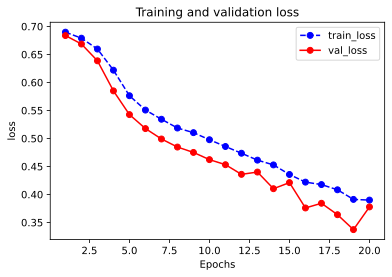

In [27]:
plot_metric(dfhistory,"loss")

![](./data/1-2-lossÊõ≤Á∫ø.png)

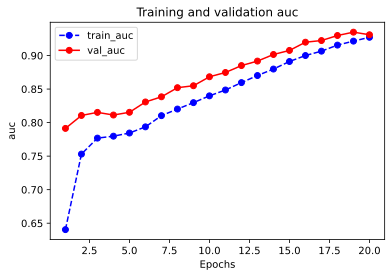

In [28]:
plot_metric(dfhistory,"auc")

![](./data/1-2-aucÊõ≤Á∫ø.png)

### ‰∫îÔºå‰ΩøÁî®Ê®°Âûã

In [29]:
def predict(model,dl):
    model.eval()
    with torch.no_grad():
        result = torch.cat([model.forward(t[0]) for t in dl])
    return(result.data)

In [32]:
#È¢ÑÊµãÊ¶ÇÁéá
y_pred_probs = predict(model,dl_valid)
y_pred_probs

tensor([[0.0034],
        [0.7355],
        [0.0132],
        ...,
        [0.1098],
        [0.7703],
        [0.2101]])

```
tensor([[8.4032e-01],
        [1.0407e-02],
        [5.4146e-04],
        ...,
        [1.4471e-02],
        [1.7673e-02],
        [4.5081e-01]])
```

In [33]:
#È¢ÑÊµãÁ±ªÂà´
y_pred = torch.where(y_pred_probs>0.5,
        torch.ones_like(y_pred_probs),torch.zeros_like(y_pred_probs))
y_pred

tensor([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])

```
tensor([[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])
```

### ÂÖ≠Ôºå‰øùÂ≠òÊ®°Âûã

Êé®Ëçê‰ΩøÁî®‰øùÂ≠òÂèÇÊï∞ÊñπÂºè‰øùÂ≠òPytorchÊ®°Âûã„ÄÇ

In [34]:
print(model.state_dict().keys())

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias'])


```
odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias'])
```

In [35]:
# ‰øùÂ≠òÊ®°ÂûãÂèÇÊï∞

torch.save(model.state_dict(), "./data/model_parameter.pkl")

net_clone = Net()
net_clone.load_state_dict(torch.load("./data/model_parameter.pkl"))

predict(net_clone,dl_valid)

tensor([[0.0250],
        [0.0715],
        [0.4210],
        ...,
        [0.1307],
        [0.0167],
        [0.2152]])

```
tensor([[0.0204],
        [0.7692],
        [0.4967],
        ...,
        [0.6078],
        [0.7182],
        [0.8251]])
```

**Â¶ÇÊûúÊú¨‰π¶ÂØπ‰Ω†ÊúâÊâÄÂ∏ÆÂä©ÔºåÊÉ≥ÈºìÂä±‰∏Ä‰∏ã‰ΩúËÄÖÔºåËÆ∞ÂæóÁªôÊú¨È°πÁõÆÂä†‰∏ÄÈ¢óÊòüÊòüstar‚≠êÔ∏èÔºåÂπ∂ÂàÜ‰∫´Áªô‰Ω†ÁöÑÊúãÂèã‰ª¨Âñîüòä!** 

Â¶ÇÊûúÂØπÊú¨‰π¶ÂÜÖÂÆπÁêÜËß£‰∏äÊúâÈúÄË¶ÅËøõ‰∏ÄÊ≠•Âíå‰ΩúËÄÖ‰∫§ÊµÅÁöÑÂú∞ÊñπÔºåÊ¨¢ËøéÂú®ÂÖ¨‰ºóÂè∑"ÁÆóÊ≥ïÁæéÈ£üÂ±ã"‰∏ãÁïôË®Ä„ÄÇ‰ΩúËÄÖÊó∂Èó¥ÂíåÁ≤æÂäõÊúâÈôêÔºå‰ºöÈÖåÊÉÖ‰∫à‰ª•ÂõûÂ§ç„ÄÇ

‰πüÂèØ‰ª•Âú®ÂÖ¨‰ºóÂè∑ÂêéÂè∞ÂõûÂ§çÂÖ≥ÈîÆÂ≠óÔºö**Âä†Áæ§**ÔºåÂä†ÂÖ•ËØªËÄÖ‰∫§ÊµÅÁæ§ÂíåÂ§ßÂÆ∂ËÆ®ËÆ∫„ÄÇ

![ÁÆóÊ≥ïÁæéÈ£üÂ±ãlogo.png](./data/ÁÆóÊ≥ïÁæéÈ£üÂ±ã‰∫åÁª¥Á†Å.jpg)